# Exploring data

Prior to doing any sort of machine learning, we need to understand our data. This can mean making sore for example that:

- know how to combine multiple data sources if we need to
- the columns are what we think they are
- the column types are correct
- that we are aware of missing values or extreme values
- that we are aware of the statistical **distribution** of the columns (**univariate** analysis)
- that we are aware of how the columns in the data are related to each other (**bivariate or multivariate analysis**)

We commonly refer to the above tasks as **EDA (exploratory data analysis)** and it is a very important task in data science, because it can guide us in how we need to process the data in preparation for modeling and what kinds of algorithms or modeling strategies the data lends itself to.

Let's now read some data and start exploring it.

In [1]:
import pandas as pd

cars = pd.read_csv("data/cars.csv")
cars.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Notice what happens if we say `headers = None`.

In [2]:
cars = pd.read_csv("data/cars.csv", header = None)
cars.head()

,0,1,2,3,4,5,6
0,buying,maint,doors,persons,lug_boot,safety,evaluation
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


One very common task with data is to **subset** the data, also called **slicing** or **filtering**. We can subset data by rows, by columns, or both. We can subset data using numeric indices (positions), or using some kind of conditional logic. If we subset data using numeric indices, we need to remember that **in Python indexing starts at 0**, not at 1.

In [3]:
cars = pd.read_csv("data/cars.csv")

Let's start by pulling some basic information about our data.

In [4]:
cars.shape # number of rows and columns

(1728, 7)

In [5]:
cars.dtypes # prints column types

buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
evaluation    object
dtype: object

In [6]:
cars.columns # column names

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'evaluation'],
      dtype='object')

In [7]:
cars.index # row indexes

RangeIndex(start=0, stop=1728, step=1)

Let's get some basic summary statistics about the columns in the data.

In [8]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,2,med,med,unacc
freq,432,432,432,576,576,576,1210


Let's see how we can rename the columns in our data.

In [9]:
new_col_names = ["buying", "maintenance", "num_doors", "num_persons", "lug_boot", "safety", "evaluation"]
cars.columns = new_col_names
cars.head()

,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Exercise

There's another way we can rename columns by using the `DataFrame`'s `rename` method. Look at the documentation for it and write a line of code that renames the `evaluation` and `safety` columns to `eval` and `safe` respectively.

In [17]:
cars.rename(columns={"evaluation":"eval", "safety":"safe"}, inplace=True)
cars.head()

,buying,maintenance,num_doors,num_persons,lug_boot,safe,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


You should not be surprised to find out that there is usually more than one way of doing things when it comes to many of the things we learn it this course. As much as possible, when you try to do something, it's good to first find out if the library (`pandas` in this case) has method for it, and if not then try to do things our own way.

### End of exercise

We use the `iloc` method to subset data by its index or position.

In [18]:
cars.iloc[4, 2] # show the 5rd row, 3rd colum

'2'

In [19]:
cars.iloc[1:5, 1:3] # 2nd through 5th row, 2nd and 3rd column

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2


Subsetting columns of the data using `iloc` is **not recommended**, because it makes the code hard to understand and because the position of a column in the data can change, which would break our code. It's much more common to subset columns using their names instead of their positions. For that we can use the `loc` method.

In [20]:
cars.loc[1:5 , ["maintenance", "num_doors"]]

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2
5,vhigh,2


Note how `loc` and `iloc` are methods, but their arguments are specified inside square brackets instead of parenthesis. This is done for historical reasons. Usually, methods are like functions and their arguments are inside parenthesis.

There's another way we can subset the data by using the `filter` method instead of `loc` or `iloc`. In the case of filter, we need to specify the `axis` argument to say if the filter applies to rows (`axis = 0`) or columns (`axis = 1`).

In [15]:
cars.filter(items = range(1, 5), axis = 0).filter(items = ["maintenance", "num_doors"], axis = 1)

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2


Note from the below example that `filter` seems much more verbose and un-intuitive than using `loc` or `iloc`, but it has its advantages.

### Exercise

Check the documentation for `filter` and use it to show the columns in the data that start with `num_`. Now do the same thing using `loc` and `cars.columns.str.startswith("num_")]`. Which is easier?

In [28]:
# filtering out to only the columns starting with 'num_'

# regex approach=
cars.filter(regex='num_*', axis=1).head()
# crazy string approach... yuck.
cars.loc[:, cars.columns.str.startswith("num_")].head()

# list comprehension way
cols_with_num = [col for col in cars.columns if "num_" in col]
cars.loc[:, cols_with_num].head()

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


### End of exercise

A very common thing to do when working with tabular data is to point to a single column of it. For example, we may want to

- change the type of a single column
- do a log transformation on a single column
- create a new column that is the sum of two other columns

and so on. So based on what we learned so far, we know that we can use `loc` to point to a single column.

In [ ]:
cars.loc[:, "num_persons"].head()

But because pointing to single columns is such a common thing to do, `pandas` offers a shortcut for doing this. Instead of typing `data.loc[:, "x"]` to reference column `x` in `data`, we can use `data["x"]` or `data.x`. Note that the second option is only possible if the column name does NOT contain any space.

In [ ]:
cars["num_persons"].head()

In [ ]:
cars.num_persons.head()

### Exercise

Notice that the type of `num_persons` is `object`. Why did that happen? It looks like it should be of type `integer` and not `object` (which is more appropriate for categorical data). Since the unique values for this columns are probably limited, list what the unique values are. You can use the `unique` method to get the unique values, or even better is to use the `value_counts` method, because it returns unique values and counts for each. Try both.

In [30]:
cars['num_persons'].value_counts()

2       576
4       576
more    576
Name: num_persons, dtype: int64

While we're at it, let's write a loop to get unique counts for each of the columns in the data.

In [36]:
uniques = {}
for col in cars.columns:
    uniques[col] = f'{cars[col].value_counts()}'
    
print(uniques)

{'buying': 'med      432\nlow      432\nhigh     432\nvhigh    432\nName: buying, dtype: int64', 'maintenance': 'med      432\nlow      432\nhigh     432\nvhigh    432\nName: maintenance, dtype: int64', 'num_doors': '3        432\n2        432\n4        432\n5more    432\nName: num_doors, dtype: int64', 'num_persons': '2       576\n4       576\nmore    576\nName: num_persons, dtype: int64', 'lug_boot': 'med      576\nsmall    576\nbig      576\nName: lug_boot, dtype: int64', 'safe': 'med     576\nlow     576\nhigh    576\nName: safe, dtype: int64', 'eval': 'unacc    1210\nacc       384\ngood       69\nvgood      65\nName: eval, dtype: int64'}


### End of exercise

We saw how we can use `value_counts` to get unique values and their counts for some column, also called a **one-way table**. What if we want counts for all the combinations of two or several columns? In statistics, we call this a **two-way table**. We can use the `pd.crosstab` function to get this. Setting `margins = True` we can add row and column sums to our two-way table. In statistics these are called **marginal sums**.

In [ ]:
pd.crosstab(cars["num_doors"], cars["num_persons"], margins = True)

Let's now read another data set. Don't worry, this one is also about cars!

In [63]:
import pandas as pd

auto = pd.read_csv('data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Exercise

Find out how many rows and columns the data has.

In [43]:
print(auto.shape)

(398, 9)


Find out how you can sort a `DataFrame` object and sort it by `cylinders` and descending `horsepower`. See if you can find out what the `inplace` argument does. This is a commom argument that many `DataFrame` methods have. It's important to be aware of it. 

In [45]:
auto.sort_values(by = ['cylinders', 'weight'], ascending = [True, False], inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs
71,19.0,3,70.0,97.00,2330.0,13.5,72,3,mazda rx2 coupe
111,18.0,3,70.0,90.00,2124.0,13.5,73,3,maxda rx3
209,19.0,4,120.0,88.00,3270.0,21.9,76,2,peugeot 504


### End of exercise

Let's talk about data visualization, or **data viz** as the kids call it. There are two common libraries for data viz. There are two main libraries for producing visualizations: `matplotlib` and `seaborn`. The `matplotlib` library is more **low-level** meaning you usually have to write more code to produce and customize your plot. The `seaborn` library is more **high-level** meaning that the plots usually look pretty good without too much work.

In [46]:
# you need to run this to produce visualizations in a jupyter notebook
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

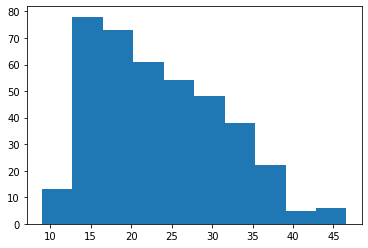

In [47]:
import matplotlib.pyplot as plt
plt.hist(auto['mpg']);

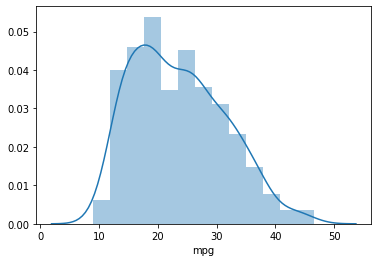

In [48]:
import seaborn as sns
sns.distplot(auto["mpg"]);

The `seaborn` library has a function called `pairplot` which can be used to get a **scatter plot matrix**, which is a matrix whose diagonal elements are histograms of each column in the data and whose off-diagonal elements are scatter plots of any pair of columns in the data. A histogram is what we call a **univariate** visualization, i.e. summarizes a single variable, and a scatter plot is a **bivariate** visualization, because it shows the relationship between two variables. 

Note that for **large datasets**, plotting scatter plots is usually **not a good idea** because it can be very slow. So if the data is very large use the `sample` method to take a sample of it before you plot any scatter plots.

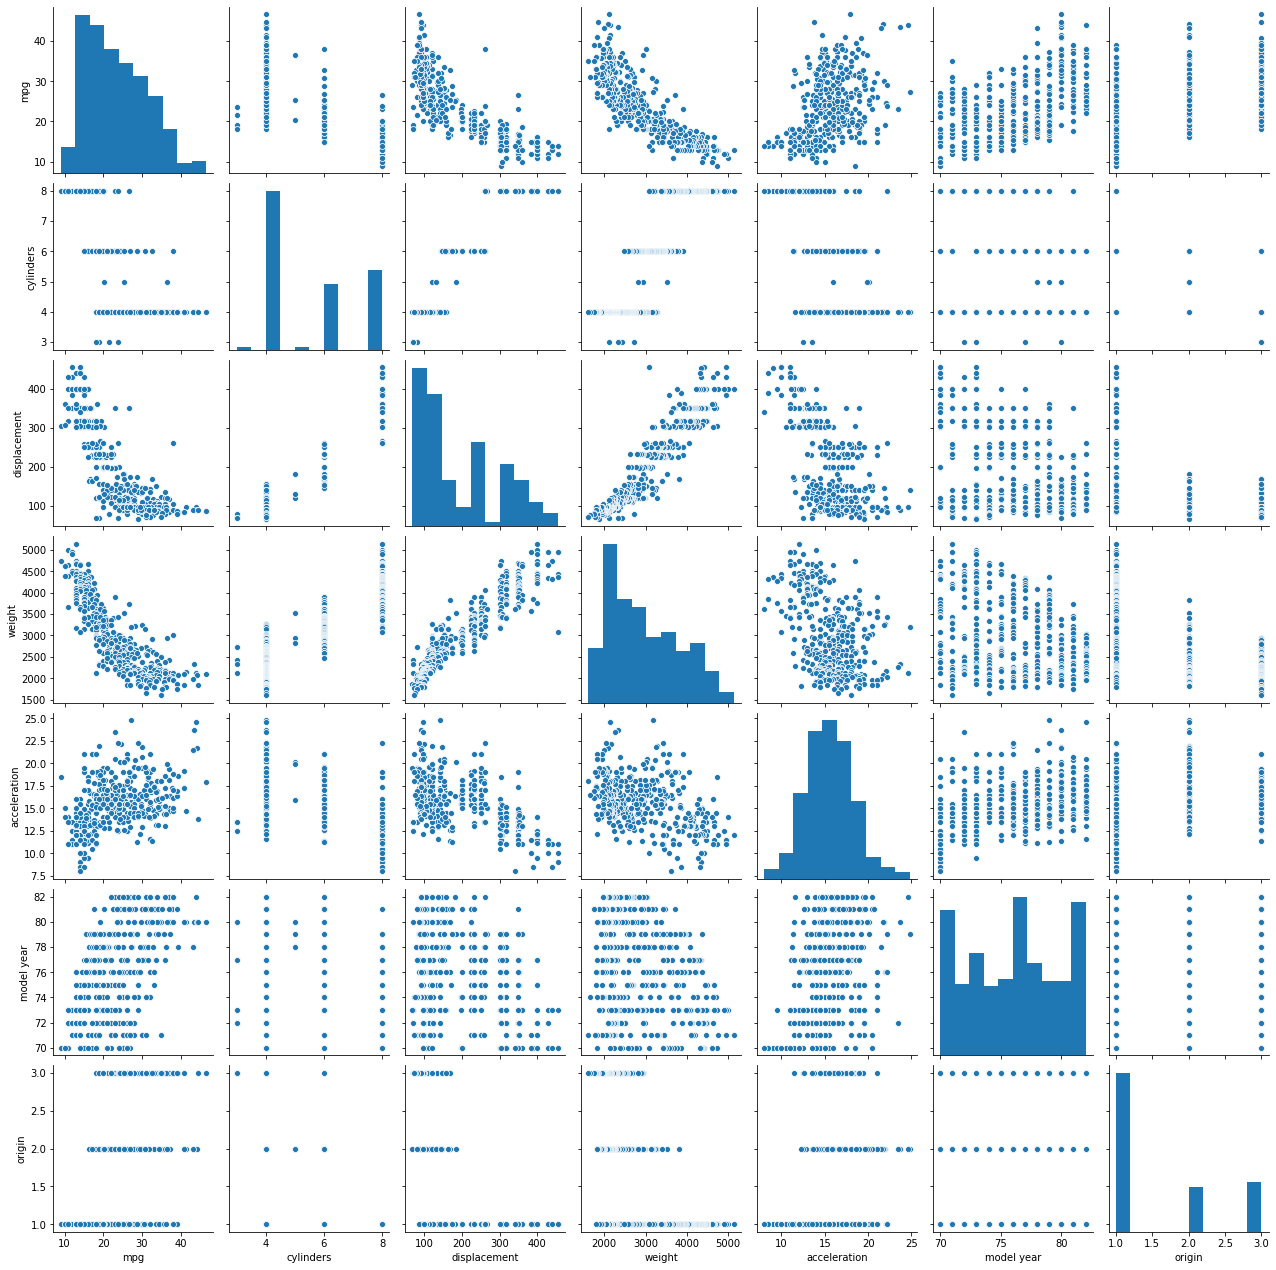

In [49]:
sns.pairplot(auto);

Similar to the scatter plot matrix, we can also show the **correlation matrix** by just calling `corr` on the `DataFrame`, which is the correlation of any pairs of numeric columns in the data.

In [ ]:
auto.corr()

We saw earlier how we can use `loc` to subset the data. We're going to use it here again, but this time we're subsetting the data by rows that meet a certain **condition**. In this case, the condition is `auto['horsepower'] == '?'`, which means cases where `horsepower` is the string `?`.

In [50]:
auto.loc[auto['horsepower'] == '?', :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick


We can make add additional conditions, but need to wrap each condition in parentheses and separate them by and (`&`) and or (`|`). Here is an example:

In [ ]:
auto.loc[(auto['horsepower'] == '?') & (auto['acceleration'] > 17)]

At some point, with lots of conditions, the code starts to look nasty, so it's good to refactor it to make it more readable:

In [51]:
hp_missing = auto['horsepower'] == '?'
acc_gt_17 = auto['acceleration'] > 17
auto.loc[hp_missing & acc_gt_17] # the parenthesis are not needed anymore

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe


We can use `~` to negate a condition.

In [52]:
auto.loc[hp_missing & ~acc_gt_17]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick


### Exercise

Plot the distribution of `horsepower`. Are you getting an error? There's a good reason: as we saw earlier, some of the rows have the string `?` for `horsepower`. So we need to convert `horsepower` into a numeric column. We can do that using the function `pd.to_numeric` (pay attention to the `errors` argument).

Convert `horsepower` to type `numeric` and then plot its distribution.

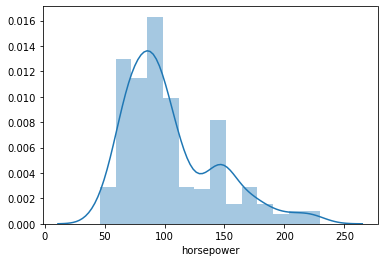

In [66]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors = 'coerce')
sns.distplot(auto["horsepower"]);

### End of exercise

We saw that `horsepower` has missing values, although the data uses the string `?` to mark them as missing. This is not a good idea, because as the previous exercise showed we run into problems when we want to analyze or visualize the column. For example let's see what the average value is for `horsepower`. There are two identical ways we can get the average of a column:

- we can call the `mean` method on the column
- we can use the `mean` function in numpy

Once again, which is best is a matter of preference. Uncomment the code below and run it. You'll notice that we get an error. Note that you can use `CTRL+/` to comment and un-comment code.

In [54]:
auto['horsepower'].mean()

104.46938775510205

In [ ]:
# import numpy as np
# np.mean(auto['horsepower'])

So we need to to convert `horsepower` to numeric so that we can get the average. We saw one way of doing that using `pd.to_numeric`: 

In [ ]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors = "coerce")

But what exactly happened to the rows where `horsepower` is `?`? They were converted into `NaN` which stands for "Not a Number". It is similar to null values in SQL tables. We can use the `isnull` method to find rows with missing values, which works with both numeric and categorical columns.

In [ ]:
auto.loc[auto['horsepower'].isnull(), :]

Now let's get the average and the median for `horsepower`.

In [ ]:
auto['horsepower'].mean()

In [ ]:
auto['horsepower'].median() # the median is the "middle value" if we sort the data

Many machine learning algorithms do not like missing values. As such, we need to deal with the missing values prior to passing the data to the ML algorithm. There are two main ways we can do so: drop them from the data, or impute the missing values.

We could throw out any rows with missing data: This is a very **conservative** approach and should only be taken if we have lots of data and very few rows with missing data.

In [58]:
auto_nona = auto.dropna() # this is how we drop any rows with nulls
auto_nona.shape

(392, 9)

### Exercise

Instead of dropping rows where **any** column is missing, we can drop rows where **certain** columns are missing. Examine `dropna` and see how you can modify it so you drop only the rows for where `horsepower` **and** `displacement` are missing (notice that we said **and**, not **or**).

In [57]:
auto_drops = auto.dropna(subset=['horsepower', 'displacement'])
auto_drops.shape

(392, 9)

### End of exercise

Instead of dropping the missing values, we can **impute** them: By imputing, we mean replacing the missing values with something that makes sense. Turns out there's a lot of ways to define what "makes sense", but one simple approach is to replace missing values for each column with the mean or median for that column. Of couse, this only works with numeric columns.

### Exercise

Replace the missing values for `horsepower` with the median value.

HINT: 
- You use `isnull` to find out if `horsepower` is missing.
- You use `loc` to find the subset of the data where `horsepower` is missing.
- You use `median` to find the median value for `horsepower`.

In [68]:
# first method...
auto.loc[auto['horsepower'].isnull(), 'horsepower'] = auto['horsepower'].median()

# second method... easier.
auto['horsepower'].fillna(auto['horsepower'].median())


TypeError: '(0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool, slice(None, None, None))' is an invalid key

### End of exercise

By now you should be able to use `pandas` to do a lot of data processing, mostly using one or two lines of code. Make sure you practice the content of this notebook a few times so you're comfortable with all of it. We will return to these concepts over an over again in future lectures.